In [4]:
import jieba
sentence = open("c_data.csv",encoding="utf8").read()
seg_list = jieba.cut(sentence,use_paddle=False)
seg_str=",".join(seg_list)
seg_str=seg_str.replace("】","")
seg_str=seg_str.replace("【","")
seg_str=seg_str.replace("...","")
seg_str=seg_str.replace(",,,","")
seg_str=seg_str.replace('","',"")
seg_str=seg_str.replace("。","")
seg_str=seg_str.replace("，","")
seg_str=seg_str.replace(", ,,","")
print(seg_str)

car,_,namestatisydistasiy,
,[,',爱驰,U5",{,,' ,',空间,足够,大,,我,这,1.85,米,200,斤,的,大,胖子,坐,前排,,媳妇,坐,后排,都,能,葛优,瘫,了,,动力,也,不错,,现在,刚,提车,没,几天,,300,多公里,还,没充,过电,,提车,的,时候,是,满,的,,操作,也,比较简单,,媳妇,这种,女司机,也,能,开,,但是,媳妇,是,颜控,只,知道,外观,挺,好看,,别的,啥,都,不,知道,,' ,'[,'' ,',外观,大气,,倍儿,有,面子,,内饰,用料,厚道,,手到,之处,都,是,软包,材质,,驾驶,质感,厚重,,高速,稳当,,8, ,气囊,满满的,安全感,,魔,都,上海,出品,,跟,特斯拉,有,一定,的,合作,,靠,谱,一点,,' ,'' ,',续航,能到,500,以上,,外观,比较,简洁,,符合,我,的,审美,,另外,上下班,用电,成本低,' ,'' ,',驾驶,感受,非常,好底盘,扎实,操控,反馈,明朗,舒适整车,制造,工艺品,控,非常,过硬续航,里程,接近,NEDC,标准车,联网,功能,实用,' ,'' ,',目前,手里,有,一台,雪铁龙,天逸,,其,phc,加持,的,悬挂,,刚柔并济,,舒适,运动,同,在,,以为,在,此,价位,上,再,无,对手,,然而,自打,遇上爱,驰,,非常,惊喜,,驾驶,体验,和,天逸有,一,拼,,甚至,在,单速,变速箱,加持,下,,人车,合一,的,感觉,都,出来,了,,正因如此,,才,冲动,消费,了,一把,,而且,续航,里程,超出,预期,,车,内,用料,厚道,,互联网,智能,也,很,人性化,,' ,',,},"",{,,' ,',新,品牌,配套,服务,还,处于,完善,阶段,,希望,在,2,年内,尽快,布局,河南省,的,售后,网点,' ,',,空间,,' ,',空间,：,2800,的,轴距,还是,suv,,肯定,宽敞,,我,身高,178,,驾驶,位置,调至,最,舒适,的,位置,,后排,翘,二郎腿,妥妥,的,,一家,四口,我,个子,最大,,空间,满意,☆, ,空间设计,亮点,：,纯,电车,,后排,中间,地,平,纯平,,这,一点,让,坐,中间,的,朋友,也,能,享受,到,贵宾席,的,待遇,,哈哈,' ,',家人,乘坐,评价,：,老妈,坐天逸会,觉得,压抑,,但,对,爱驰,评价

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\kw\AppData\Local\Temp\jieba.cache
Loading model cost 3.262 seconds.
Prefix dict has been built successfully.


(0.0, 1.0, 0.0, 1.0)

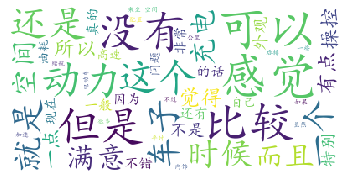

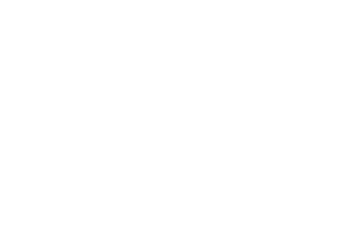

In [1]:
import matplotlib.pyplot as plt                          #数学绘图库
from PIL import Image
import numpy as np                                      #科学数值计算包，可用来存储和处理大型矩阵
import jieba                                            #分词库
from wordcloud import WordCloud, ImageColorGenerator   #词云库
#需要对中文进行处理
import matplotlib.font_manager as fm
import cv2
#1、读入txt文本数据
#text = open(r'D:\Python\test\wordcloud\data\english.txt',"r").read()
 
# 2、结巴分词:cut_all参数可选, True为全模式，False为精确模式,默认精确模式
#cut_text= jieba.cut(text,cut_all=False)
#result= "/".join(cut_text)#必须给个符号分隔开分词结果,否则不能绘制词云
 
#3、初始化自定义背景图片
image = Image.open('car.png')
graph = np.array(image)
graph = cv2.resize(graph,(1024,800))
#读取停用词表
stopwords_path='CNstopwords.txt'

#读取要分析的文本
text_path="USER-DATA-6221.txt"
#读取要分析的文本，读取格式
text=open(text_path,encoding="utf8").read()
#定义个函数式用于分词
def jiebaclearText(text):
    #定义一个空的列表，将去除的停用词的分词保存
    mywordList=[]
    #进行分词
    seg_list=jieba.cut(text,cut_all=False)
    #将一个generator的内容用/连接
    listStr='/'.join(seg_list)
    #打开停用词表
    f_stop=open(stopwords_path,encoding="utf8")
    #读取
    try:
        f_stop_text=f_stop.read()
    finally:
        f_stop.close()#关闭资源
    #将停用词格式化，用\n分开，返回一个列表
    f_stop_seg_list=f_stop_text.split("\n")
    #对默认模式分词的进行遍历，去除停用词
    for myword in listStr.split('/'):
        #去除停用词
        if not(myword.split()) in f_stop_seg_list and len(myword.strip())>1:
            mywordList.append(myword)
    return ' '.join(mywordList)
text1=jiebaclearText(text)

#生成
wc=WordCloud(
    background_color="white", 
    max_words=50,
   # mask=graph,            #设置图片的背景
    max_font_size=60,
    random_state=42,
    font_path='C:/Windows/Fonts/simkai.ttf'   #中文处理，用系统自带的字体
    ).generate(text1)

#为图片设置字体
my_font=fm.FontProperties(fname='C:/Windows/Fonts/simkai.ttf')
#产生背景图片，基于彩色图像的颜色生成器
#image_colors=ImageColorGenerator(graph)
#开始画图
#plt.imshow(wc.recolor(color_func=image_colors))
plt.imshow(wc)
#为云图去掉坐标轴
plt.axis("off")
#画云图，显示
plt.figure()
#为背景图去掉坐标轴
plt.axis("off")
#plt.imshow(graph,cmap=plt.cm.gray)

In [2]:
text1

'驾驶 感受 非常 底盘 扎实 操控 反馈 明朗 舒适 整车 制造 工艺品 非常 过硬 续航 里程 接近 NEDC 标准 联网 功能 实用 希望 配置 选择 希望 车内 添加 众创 产品 尽快 上线 腿部 空间 不论 前排 后排 座椅 支撑 到位 开久 不会 虽然 电动车 动力 算是 平平 无奇 数据 绝对 可以 应对 各种 情况 而且 输出 足够 线性 初次 驾驶 不会 觉得 传统 燃油 车有 差别 操控 来说 绝对 这辆 最大 惊喜 路感 反馈 清晰 方向 指向性 明确 底盘 调校 绝对 配得 Roland Gumpert Quattro 之父 名字 根据 个人 驾驶 习惯 不同于 燃油 大同小异 同样 一步 燃油 车开 绝对 不是 一个 能耗 等级 U5 续航 里程 真的 可以 充电 ... 续航 能到 500 以上 外观 比较 简洁 符合 审美 另外 上下班 用电 成本低 颜色 没选到 自己 满意 想要 蓝色 外观 内饰 灰色 空间 非常 宽敞 内部空间 后备箱 不错 原来 使用 明锐 内部 乘坐 空间 优势 明显 动力 原来 使用 燃油 对比 明显 原来 这个 应该 2.0 水平 底盘 很稳 帕萨特 观致 感觉 差不多 SUV 这个 程度 感觉 不错 没有 对比 感觉 可以 接受 充电 慢充 稍微 噪音控制 高级 感觉 减震 效果 外观 装配 做工 不错 虽然 品牌 整体 外观 简洁 符合 个人 审美 购买 主要 原因 之一 内饰 简洁 简单 座椅 仪表 做工 精致 质感 ... 目前 手里 一台 雪铁龙 天逸 phc 加持 悬挂 刚柔并济 舒适 运动 以为 价位 对手 然而 自打 遇上爱 非常 惊喜 驾驶 体验 天逸有 甚至 单速 变速箱 加持 人车 合一 感觉 出来 正因如此 冲动 消费 一把 而且 续航 里程 超出 预期 用料 厚道 互联网 智能 人性化 品牌 配套 服务 处于 完善 阶段 希望 年内 尽快 布局 河南省 售后 网点 空间 2800 轴距 还是 suv 肯定 宽敞 身高 178 驾驶 位置 调至 舒适 位置 后排 二郎腿 妥妥 一家 四口 个子 最大 空间 满意 空间设计 亮点 电车 后排 中间 纯平 一点 中间 朋友 享受 贵宾席 待遇 哈哈 家人 乘坐 评价 老妈 坐天逸会 觉得 压抑 爱驰 评价 最多 就是 宽敞 憋屈 ... 

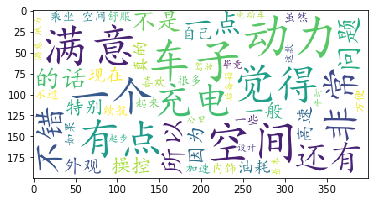

In [4]:
text2=text1.replace("可以","")
text2=text2.replace("比较","")
text2=text2.replace("但是","")
text2=text2.replace("感觉","")
text2=text2.replace("没有","")
text2=text2.replace("而且","")
text2=text2.replace("还是","")
text2=text2.replace("就是","")
text2=text2.replace("时候","")
text2=text2.replace("这个","")
W=WordCloud(
    background_color="white", 
    max_words=50,
   # mask=graph,            #设置图片的背景
    max_font_size=60,
    random_state=42,
    font_path='C:/Windows/Fonts/simkai.ttf'   #中文处理，用系统自带的字体
    ).generate(text2)
plt.imshow(W)

In [5]:
word_list=[]
for word in text2.strip().split(" "):
    word_list.append(word)

In [60]:
import pandas as pd
result = pd.value_counts(word_list)
print(result)

         9356
空间       7322
动力       3797
...      2281
就是       2231
         ... 
相加          1
737EV       1
坐真          1
万买个         1
储物量         1
Length: 16083, dtype: int64


In [12]:
from collections import Counter
result = Counter(word_list)
import pandas as pd
result = pd.DataFrame(result.keys(),result.values())
result.to_csv("result.csv")

In [ ]:
import jieba
from os import path  #用来获取文档的路径

#词云
from PIL import Image
import numpy as  np
import matplotlib.pyplot as plt
#词云生成工具
from wordcloud import WordCloud,ImageColorGenerator
#需要对中文进行处理
import matplotlib.font_manager as fm

#背景图
bg=np.array(Image.open("car.png"))

#获取当前的项目文件加的路径
d=path.dirname(__file__) 
#读取停用词表
stopwords_path='stopwords.txt'
#添加需要自定以的分词
jieba.add_word("侯亮平")
jieba.add_word("沙瑞金")
jieba.add_word("赵东来")

#读取要分析的文本
text_path="人民的名义.txt"
#读取要分析的文本，读取格式
text=open(path.join(d,text_path),encoding="utf8").read()
#定义个函数式用于分词
def jiebaclearText(text):
    #定义一个空的列表，将去除的停用词的分词保存
    mywordList=[]
    #进行分词
    seg_list=jieba.cut(text,cut_all=False)
    #将一个generator的内容用/连接
    listStr='/'.join(seg_list)
    #打开停用词表
    f_stop=open(stopwords_path,encoding="utf8")
    #读取
    try:
        f_stop_text=f_stop.read()
    finally:
        f_stop.close()#关闭资源
    #将停用词格式化，用\n分开，返回一个列表
    f_stop_seg_list=f_stop_text.split("\n")
    #对默认模式分词的进行遍历，去除停用词
    for myword in listStr.split('/'):
        #去除停用词
        if not(myword.split()) in f_stop_seg_list and len(myword.strip())>1:
            mywordList.append(myword)
    return ' '.join(mywordList)
text1=jiebaclearText(text)
#生成
wc=WordCloud(
    background_color="white", 
    max_words=200,
    mask=bg,            #设置图片的背景
    max_font_size=60,
    random_state=42,
    font_path='C:/Windows/Fonts/simkai.ttf'   #中文处理，用系统自带的字体
    ).generate(text1)
#为图片设置字体
my_font=fm.FontProperties(fname='C:/Windows/Fonts/simkai.ttf')
#产生背景图片，基于彩色图像的颜色生成器
image_colors=ImageColorGenerator(bg)
#开始画图
plt.imshow(wc.recolor(color_func=image_colors))
#为云图去掉坐标轴
plt.axis("off")
#画云图，显示
plt.figure()
#为背景图去掉坐标轴
plt.axis("off")
plt.imshow(bg,cmap=plt.cm.gray)

#保存云图
wc.to_file("man.png")
————————————————
版权声明：本文为CSDN博主「菊子皮」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/meiqi0538/article/details/79558589